# Notes on Signal Transduction 

#### References 
E. Klipp *et al.*, Systems Biology in Practice, Wiley-VCH

- Cell senses Extracellular signals such as Intercellular communication and Cellular stress, which are converted to Intracellular signals and Sequences of Reactions.

- Typical signals are hormones, pheromones, heat, cold, light, osmotic pressure and appearance or concentration change of substrances such as glucose, K+, Ca+ or cAMP.

- On a molecular level, signalling involves: production and egradation of substances, molecular modifications (phosphorelation, methylation, aetylation), activation and inhibition of reactions.

- From a modelling perspective, signalling pathways serve for information processsing, transfer of information

- Typically, the number of molecules involved in signalling processes is on the order of 10-10ˆ4 molecules per cell

- In signalling processes, amounts of catalysts and their substrates are frequently in the same order of magnitude, (which makes the quasi-steady-state assumption used in Michaelis-Menten kinetics void).


## Structue of intracellular communication

- A substrance acting as a ligand or physical stimulus, **the signal** approaches the cell surface

- The stimulus may penetrate the cell membrane and bind to a receptor in the cell interior or the signal is percieved by a transmembrane receptor.

- The receptor might change its own state from susceptible to active and thirgger subsequent processes within the cell, stimulating an internal signalling cascade.

- The cascade may involve a series of changes in protein phosphorylation states.

- The sequence of state changes crosses the nuclear membrane.

- A transcription factor is activated or deactivated, changing it binding properties to regulatory regions on te DNA upstream of a set of genes.

- The transcritpion rate of these genes is altered.

- Newly produced proteins or chancges in protein concentration cause the actual resonse of the cell to the signal

In general:

- The signal interacts with the receptor

- The receptor activates a cascade of intracellular processes including complex formations, phosphorylations and transport steps

- Eventually, transctiption factors that regulate the expression of a set of genes, are activated.


## Receptor-ligand interactions

The simplest concept of the interaction between R and L is reversible binding to form the active complex RL:

<img src="rl1.png\" style="width: 300px;"/>

The dissociation constant is calculated as 

<img src="dc.png\" style="width: 100px;"/>

and has typical values between 10ˆ(-12)M and 10ˆ(-6).

However, cells have the ability to regulate the number and activity of specific receptors, by balancing production and degradation of receptors and thus regulating their number. Also, phosphorylations of cetrain residues that are found in the cytosolic domain (serine, threonine, tyrosine) regulates activity. So a more realistic scenario for L-R interaction would be something like this:

<img src="rl2.png\" style="width: 500px;"/>

where the `v_p*` are rates of production, the `v_d*` are rates of degradation and the rest are rates of transition between states.

In general, the dynamics of this scenario can be described by the following differential equations

<img src="de.png\" style="width: 500px;"/>

Note that all the rates are susceptible to be influenced by the cell state, however, one may choose to assume constant values, e.g. for the production rates. For the degradation rates, it is natural to assume them to be linearly dependent on the concentration of their substrates. The same can be assumed for the rates of state changes of the receptor, from inactive to susceptible. Finally, the receptor activation should be dependent on the ligand and susceptible receptor concentrations. However, if the receptor is an oligomer, it would be more sensible to include this information is the rate  expression, using the Hill coefficient.


<img src="eqs.png\" style="width: 500px;"/>

### A dynamic model of the change in state of a membrane receptor

Using experimental data from [Yi *et al*](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC196877/pdf/10010764.pdf), we can take the following parameter values and simulate the timecourse of the change of state of the membrane receptor system described above, as follows:

<img src="ex2.png\" style="width: 400px;"/>

In [ ]:
# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Parameters
kps = 4 
kds = 4*10^(-1)
kda = 4*10^(-3)
ksa = 2*10^(8)
kas = 1*10^(-2)
params = (kps, kds, kda, ksa, kas)

# Initial conditions
Rs = 10000
Ra = 0
L = 1
ini = (Rs, Ra, L)

# Time
dt = 0.001
t = np.arange(0,0.05,dt)

# ODE system (in format used for odeint)
def myODE(u,t,params):
    kps, kds, kda, ksa, kas = params
    Rs, Ra, L = u[0], u[1], u[2]

    dRs = kps - kds*Rs + 0 - 0 - ksa*Rs*L + kas*Ra
    dRa = -kda*Ra + ksa*Rs*L - kas*Ra + 0

    return (dRs, dRa)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,))   
tRs = solution[:,0]
tRa = solution[:,1]
tL = solution[:,2]


# Show over time
fig, ax = plt.subplots()
ax.plot(t, tRs, 'r', label='Rs')
ax.plot(t, tRa, 'b', label='Ra')
legend = ax.legend(loc='center', shadow=True)
plt.show()

As you can see, after stimulation with the ligand, the concentration of the active receptor increases immediatelly and then declines slowly, while the susceptible recemtor is effectively reduced to zero.

## Structural components of signalling pathways

Signalling pathways often constitute highly complex networks, but luckly, these are build up of specific 'building blocks' that include Ras proteins, G protein cycles, Phosphorelay systems and MAP kinase cascades. 

Let's have a look at how a phosphorelay system behaves. A similar approach can be applied to the other types of components.

### Phosphorelay (phosphotransfer) systems - how Yeast responds to osmotic shock - and stochastic vs deterministic approaches

<img src="pr.png\" style="width: 300px;"/>

After an initial phosphorylation (uing a phosphate donor, such as ATP), the phosphate group is transfered directly from one protein to the next without further consumption of the donor.

The image above is a schematic of of the phosphorelay system of the high osmolarity glycerol (HOG) signalling pathway in yeast. 

- Under normal conditions, the dimer Sln1 continuously phosphorelates at a histidine residue, under consumption of ATP.

- Sunsequently, the phophate group is transfered to an aspartate residue of the Sln1, then to a histidine residue of Ypd1 and finally to an aspartate residue of Ssk1.

- Ssk1 is continuously dephosphorelated by a phosphotase.

- The pathway is blocked by an increase in the external osmolaroty and a concomitant loss of turgor prssure in the cell; the phosphorylation os Sln1 stops, the system runs out of transferable phosphate groups and the concentration of Ssk1 rises.

This downstream signal can be described with the following ODEs:

<img src="ex3.png\" style="width: 500px;"/>

The conservation relations are in agreement with the assumption that production and degradation of the proteins occur on a larger timescale than the phosphorylation events.

Finally, based on a [study by Klipp et al.](http://www.nature.com/nbt/journal/v23/n8/pdf/nbt1114.pdf), we use the  parameter values shown above.

```
# Parameters
k1=0.4
k2=1
k3=50
k4=50
k5=0.5
params = (k1, k2, k3, k4, k5)

# Initial conditions
Sln1 = 
Sln1AP = 
Sln1HP = 
Ypd1 = 
Ypd1P = 
Ssk1 = 
Ssk1P = 
ini = (Sln1, Sln1Ap, Sln1Hp, Ypd1, Ypd1P, Ssk1, Ssk1P)

# Time
dt = 0.001
t = np.arange(0,0.05,dt)

# ODE system (in format used for odeint)
def myODE(u,t,params):
    k1, k2, k3, k4, k5 = params
    Sln1, Sln1Ap, Sln1Hp, Ypd1, Ypd1P, Ssk1, Ssk1P = u[0], u[1], u[2], u[3], u[4], u[5], u[6]

    dSln1 = -k1* Sln1 + k3* Sln1AP*Ypd1
    dSln1HP = k1* Sln1 + k2*Sln1HP
    dSln1AP = k2* Sln1HP - k3*Sln1AP*Ypd1
    dYpd1 = k4* Ypd1P*Ssk1 - k3*Sln1AP*Ypd1
    dYpd1P = -k4*Ypd1P*Ssk1 + k3*Sln1AP*Ypd1
    dSsk1 = k5*Ssk1P + k4*Ypd1P*Ssk1
    dSsk1P = -k5*Ssk1P + k4*Ypd1P*Ssk1

    return (dSln1, dSln1Ap, dSln1Hp, dYpd1, dYpd1P, dSsk1, dSsk1P)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,))  
tSln1 = solution[:,0]
tSln1AP = solution[:,1]
tSln1HP = solution[:,2]
tYpd1 = solution[:,3]
tYpd1P = solution[:,4]
tSsk1 = solution[:,5]
tSsk1P =solution[:,6]

# Show over time
fig, ax = plt.subplots()
ax.plot(t, tSln1, 'r', label='Sln1')
ax.plot(t, tSln1Hp, 'b', label='Sln1Hp')
ax.plot(t, tSln1Ap, 'g', label='Sln1Ap')
ax.plot(t, tYpd1, 'y', label='Ypd1')
ax.plot(t, tYpd1P, 'c', label='Ypd1P')
ax.plot(t, tSsk1, 'k', label='Ssk1')
ax.plot(t, tSsk1P, 'k--', label='Ssk1P')
legend = ax.legend(loc='center', shadow=True)
plt.show()
```

## Dynamic and regulatory features of sygnalling pathways

# Mathematical model of how *S. cerevisiae* copes with loss of turgor

*S. cerevisiae*

## The High Osmolarity Gycerol (HOG) system

- Plasma membrane-localised sensor histidine kinase Sln1

    - Under ambient conditions, Sln1 is active and inhibits signalling
    
    - Upon loss of turgor pressure, Sln1 is inactivated, resulting in activation of a mitogen-activated protein (MAP) kinase cascade and phosphorylation of the MAP kinase Hog1. 
    
    - Active Hog1 accumulates in the nucleus where it affects gene expression and stimulates the production of glycerol. 
    
    - Gycerol serves as an osmolyte to increase intracellular osmotic pressure.
        
        - Glycerol accumulation is also controlled by rapid closing of the aquaglyceroporin Fps1, which is an osmolarity-regulated glycerol channel.
        
        
        
## The model

The model presented here comprises receptor stimulation, the HOG signaling pathway, activation of gene expression, adaptation of cellular metabolism, glycerol accumulation and a thermodynamic description of the control of volume and osmotic pressure.
    
    
    
    
    
    
    
    
    
    
    
    
   
    
    
    
    
    
    
    
    

### The dynamics of the phosphorelay module

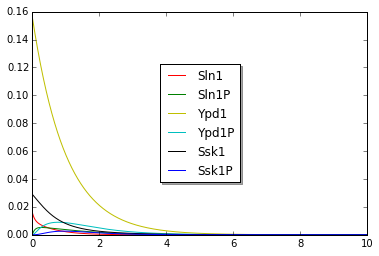

In [10]:

# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# Parameters
k1TCS = 5
k2TCS = 50
k2mTCS = 50
k3TCS = 50
k4TCS = 0.415
params = (k1TCS, k2TCS, k2mTCS, k3TCS, k4TCS)

# Total numbers
Sln1T = 0.016
Ypd1T = 0.156
Ssk1T = 0.029
V = 1

# Initial conditions
Sln1P = 2.25*np.power(10,-3)
Ypd1P = 36*np.power(10,-3)
Ssk1P = 1.88*np.power(10,-3)
Sln1 = Sln1T - Sln1P
Ypd1 = Ypd1T - Ypd1P
Ssk1 = Ssk1T - Ssk1P
ini = (Sln1, Sln1P, Ypd1, Ypd1P, Ssk1, Ssk1P)

# Time
dt = 0.001
t = np.arange(0,10,dt)

# ODE system (in format used for odeint)
def myODE(init,t,params):
    
    k1TCSTCS, k2TCS, k2mTCS, k3TCS, k4TCS = params
    
    Sln1, Sln1P, Ypd1, Ypd1P, Ssk1, Ssk1P = init[0], init[1], init[2], init[3], init[4], init[5]

    # rates
    v1TCS = k1TCS*Sln1
    v2TCS = k2TCS*Sln1P*Ypd1 - k2mTCS*Sln1*Ypd1P
    v3TCS = k3TCS*Ssk1*Ypd1P
    v4TCS = k4TCS*Ssk1P
    
    # equations
    dSln1 = -v1TCS + v2TCS - Sln1*V
    dSln1P = v1TCS - v2TCS - Sln1P*V
    dYpd1 = -v2TCS + v2TCS - Ypd1*V
    dYpd1P = v2TCS - v3TCS - Ypd1P*V
    dSsk1 = -v3TCS + v4TCS - Ssk1*V
    dSsk1P = v3TCS - v4TCS - Ssk1P*V
    
    # conservation relations
    Sln1 = Sln1T - Sln1P
    Ypd1 = Ypd1T - Ypd1P
    Ssk1 = Ssk1T - Ssk1P
    
    return (dSln1, dSln1P, dYpd1, dYpd1P, dSsk1, dSsk1P)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,)) 
tSln1 = solution[:,0]
tSln1P = solution[:,1]
tYpd1 = solution[:,2]
tYpd1P = solution[:,3]
tSsk1 = solution[:,4]
tSsk1P =solution[:,5]

# Show over time
fig, ax = plt.subplots()
ax.plot(t, tSln1, 'r', label='Sln1')
ax.plot(t, tSln1P, 'g', label='Sln1P')
ax.plot(t, tYpd1, 'y', label='Ypd1')
ax.plot(t, tYpd1P, 'c', label='Ypd1P')
ax.plot(t, tSsk1, 'k', label='Ssk1')
ax.plot(t, tSsk1P, 'b', label='Ssk1P')
legend = ax.legend(loc='center', shadow=True)
plt.show()

### Dynamics of the MAP Kinase cascade

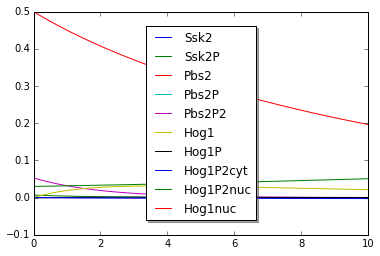

In [9]:

# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# Parameters
k1MAP = 1.438
k2MAP = 1.438
k3MAP = 1.438
k4MAP = 1.438
k5MAP = 1.438
k1mMAP = 0.011
k2mMAP = 0.011
k2mMAP = 0.011
k3mMAP = 0.011
k4mMAP = 0.011
k5mMAP = 0.011
kHog1P2trans = 0.029
kHog1dephos = 0.0053
kHog1trans1 = 0.110
kHog1trans2 = 0.091
params = (k1MAP, k2MAP, k3MAP, k4MAP, k1mMAP, k2mMAP, k3mMAP, k4mMAP, kHog1P2trans, kHog1dephos, kHog1trans1, kHog1trans2)

# Total numbers
Ssk2T = 0.0067
Pbs2T = 0.053
Hog1T = 0.167

Vcyt = 1 ##KS
Vnuc = 0.5 ##KS
Vratio = 0.5 ##KS
VT = 1.5 ##KS
protein2 = 1 ##KS
protein2_0=1 ##KS

# Initial conditions
Ssk2 = 5.306*np.power(10,-3)
Pbs2 = 42.9*np.power(10,-3)
Pbs2P = 8.38*np.power(10,-3)
Hog1 = 79*np.power(10,-3)
Hog1P = 15.5*np.power(10,-3)
Hog1P2cyt = 0.9*np.power(10,-3)
Hog1P2nuc = 0.03
Hog1nuc = 0.5

Ssk2P = Ssk2T - Ssk2 ##KS
Pbs2P2 = Pbs2T - (Pbs2 + Pbs2P) ##KS
Hog1T = (Hog1 + Hog1P + Hog1P2cyt)*(Vcyt/VT) + (Hog1P2nuc + Hog1nuc)*(Vnuc/VT) ##KS

ini = (Ssk2, Ssk2P, Pbs2, Pbs2P, Pbs2P2, Hog1, Hog1P, Hog1P2cyt, Hog1P2nuc, Hog1nuc)

# Time
dt = 0.001
t = np.arange(0,10,dt)

# ODE system (in format used for odeint)
def myODE(init,t,params):
    
    k1MAP, k2MAP, k3MAP, k4MAP, k1mMAP, k2mMAP, k3mMAP, k4mMAP, kHog1P2trans, k1Hog1dephos, k1Hog1trans1, k1Hog1trans2 = params
    
    Ssk2, Ssk2P, Pbs2, Pbs2P, Pbs2P2, Hog1, Hog1P, Hog1P2cyt, Hog1P2nuc, Hog1nuc = init[0], init[1], init[2], init[3], init[4], init[5], init[6], init[7], init[8], init[9]

    # rates
    v1MAP = k1MAP*Ssk2*1#Ssk1 ##KS
    v1mMAP = k1mMAP*Ssk2P
    v2MAP = k2MAP*Pbs2*Ssk2P
    v2mMAP = k2mMAP*Pbs2P
    v3MAP = k3MAP*Pbs2P*Ssk2P
    v3mMAP = k3mMAP*Pbs2P2
    v4MAP = k4MAP*Hog1*Pbs2P2
    v4mMAP = k4mMAP*Hog1P
    v5MAP = k5MAP*Hog1P*Pbs2P2
    v5mMAP = k5mMAP*Hog1P2cyt
    vHog1trans1 = kHog1trans1*Hog1nuc
    vHog1trans2 = kHog1trans2*Hog1
    vHog1P2trans = kHog1P2trans*Hog1P2nuc
    vHog1dephos = (protein2/protein2_0)*kHog1dephos*Hog1P2nuc
    Hog1P2 = Hog1P2cyt*(Vcyt/VT)+Hog1P2nuc*(Vnuc/VT)
    
    # equations
    dSsk2 = -v1MAP + v1mMAP - Ssk2*Vratio
    dSsk2P = v1MAP - v1mMAP - Ssk2P*Vratio
    dPbs2 = -v2MAP + v2mMAP - Pbs2*Vratio
    dPbs2P = v2MAP - v2mMAP - v2MAP + v3mMAP - Pbs2P*Vratio
    dPbs2P2 = v3MAP - v3mMAP - Pbs2P2*Vratio
    dHog1 = -v4MAP + v4mMAP - vHog1trans2 + vHog1trans1*(Vnuc/Vcyt) - Hog1*Vratio
    dHog1P = v4MAP - v4mMAP - v5MAP + v5mMAP - Hog1P*Vratio
    dHog1P2cyt = v5MAP - v5mMAP - vHog1P2trans - Hog1P2cyt*Vratio
    dHog1P2nuc = vHog1P2trans*(Vcyt/Vnuc) - vHog1dephos
    dHog1nuc = vHog1trans2*(Vcyt/Vnuc) - vHog1trans1 + vHog1dephos
    
    # conservation relations
    Ssk2T = Ssk2 + Ssk2P ##KS 
    Pbs2T = Pbs2 + Pbs2P + Pbs2P2 ##KS
    Hog1T = (Hog1 + Hog1P + Hog1P2cyt)*(Vcyt/VT) + (Hog1P2nuc + Hog1nuc)*(Vnuc/VT) ##KS
    
    return (dSsk2, dSsk2P, dPbs2, dPbs2P, dPbs2P2, dHog1, dHog1P, dHog1P2cyt, dHog1P2nuc, dHog1nuc)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,)) 
tSsk2 = solution[:,0]
tSsk2P = solution[:,1]
tPbs2 = solution[:,2]
tPbs2P = solution[:,3]
tPbs2P2 = solution[:,4]
tHog1 = solution[:,5]
tHog1P = solution[:,6]
tHog1P2cyt = solution[:,7]
tHog1P2nuc = solution[:,8]
tHog1nuc = solution[:,9]

# Show over time
fig, ax = plt.subplots()
ax.plot(t, tSsk2, label='Ssk2')
ax.plot(t, tSsk2P, label='Ssk2P')
ax.plot(t, tPbs2, label='Pbs2')
ax.plot(t, tPbs2P, label='Pbs2P')
ax.plot(t, tPbs2P2, label='Pbs2P2')
ax.plot(t, tHog1, label='Hog1')
ax.plot(t, tHog1P, label='Hog1P')
ax.plot(t, tHog1P2cyt, label='Hog1P2cyt')
ax.plot(t, tHog1P2nuc, label='Hog1P2nuc')
ax.plot(t, tHog1nuc, label='Hog1nuc')

legend = ax.legend(loc='center', shadow=True)
plt.show()

### Dynamics of Transcription and Translation

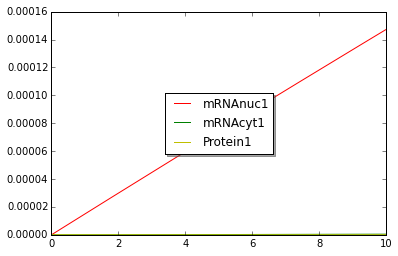

In [11]:


# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# Parameters
kts1 = 0.0005
kex1 = 0.0037
krd1 = 8.085
ktl1 = 0.0205
kpd1 = 0.000125
#kts2 = 0.00045
#kex2 = 0.00005
#krd2 = 0.0937
#ktl2 = 0.00125
#kpd2 = 0.00014
params = (kts1, kex1, krd1, ktl1, kpd1)
#params = (kts2, kex2, krd2, ktl2, kpd2)

# Total numbers
Vratio = 0.5

# Initial conditions
mRNAnuc1 = 4*np.power(10,-3)
mRNAcyt1 = 1.06*np.power(10,-3)
Protein1 = 1.7*np.power(10,-6)
#mRNAnuc2 = 27*np.power(10,-2)
#mRNAcyt2 = 0.2*np.power(10,-3)
#Protein2 = 1.27*np.power(10,-3)
ini = (mRNAnuc1, mRNAcyt1, Protein1)
#ini = (mRNAnuc2, mRNAcyt2, Protein2)

# Time
dt = 0.001
t = np.arange(0,10,dt)

# ODE system (in format used for odeint)
def myODE(init,t,params):
    
    kts1, kex1, krd1, ktl1, kpd1 = params
    #kts2, kex2, krd2, ktl2, kpd2 = params
    
    mRNAnuc1, mRNAcyt1, Protein1 = init[0], init[1], init[2]
    #mRNAnuc2, mRNAcyt2, Protein2 = init[0], init[1], init[2]

    # rates
    vts = kts1*Hog1P2nuc
    vex = kex1*mRNAnuc1
    vrd = kts1*mRNAcyt1
    vtl = ktl1*mRNAcyt1
    vpd = kpd1*Protein1
    #vts = kts2*Hog1P2nuc
    #vex = kex2*mRNAnuc2
    #vrd = kts2*mRNAcyt2
    #vtl = ktl2*mRNAcyt2
    #vpd = kpd2*Protein2    
    
    # equations
    dmRNAnuc1 = vts - vex
    dmRNAcyt1 = vex*(Vnuc/Vcyt) - vrd - mRNAcyt1*Vratio
    dProtein1 = vtl - vpd - Protein1*Vratio
    #dmRNAnuc2 = vts - vex
    #dmRNAcyt2 = vex*(Vnuc/Vcyt) - vrd - mRNAcyt2*Vratio
    #dProtein2 = vtl - vpd - Protein2*Vratio    
    
    # conservation relations
    
    
    return (dmRNAnuc1, dmRNAcyt1, dProtein1)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,)) 
tmRNAnuc1 = solution[:,0]
tmRNAcyt1 = solution[:,1]
tProtein1 = solution[:,2]
#tmRNAnuc1 = solution[:,0]
#tmRNAcyt1 = solution[:,1]
#tProtein1 = solution[:,2]


# Show over time
fig, ax = plt.subplots()
ax.plot(t, tmRNAnuc1, 'r', label='mRNAnuc1')
ax.plot(t, tmRNAcyt1, 'g', label='mRNAcyt1')
ax.plot(t, tProtein1, 'y', label='Protein1')
legend = ax.legend(loc='center', shadow=True)
plt.show()

### Dynamics of the carbohydrate metabolism

rates
equations
-0.5 -2.02379085946 0.80149835946 185.285729028 -187.779203646 -1.67045358608 -0.0315 -0.201 inf 17.2937894294 -17.8287894294 -0.331929024433 -1.01807097557 1.0
rates
equations
-0.5 -2.02379085946 0.80149835946 185.285729028 -187.779203646 -1.67045358608 -0.0315 nan nan 17.2937894294 -17.8287894294 -0.331929024433 -1.01807097557 1.0
Illegal input detected (internal error).
Run with full_output = 1 to get quantitative information.


/Users/sasaki/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:133: RuntimeWarning: divide by zero encountered in double_scalars


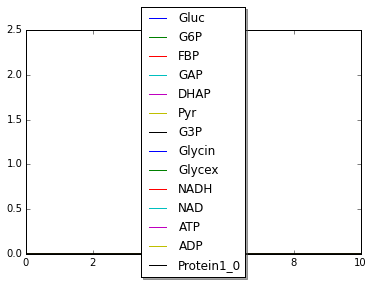

In [43]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 03 2016

@author:    Karin Sasaki

@descript:  Mathematical model of the High Osmolarity Gycerol (HOG) system of S. cerevisiae
            Dynamics of the of the carbohydrate metabolism
on.
"""

# import modules and libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline


# Parameters
v1_0 = 1.296
k2 = 1.777
k21 = 0.2
k22 = 1.2
k23 = 0.2
k3 = 0.895
k31 = 0.01
k32 = 0.012
k4 = 1.8764*np.power(10,-3)
Keq4 = 0.81
kFBP4 = 0.054
kDHAP4 = 2
kGAP4 = 2
vbf4 = 5
KIGAP4 = 10
k5 =  190
Keq5 = 0.45
KDHAP5 = 0.38
KGAP5 = 0.064
k6 = 45.127
k7 = 639.137
KPyr7 = 70
KNAD7 = 160
KI7 = 20
k8 = 5.6425
k81  = 1.2
k82 = 0.6
k9 = 0.8090
KPyr9 = 0.92
KATP9 = 13.2
k10 = 1.9377
KG6P10 = 2.7
KATP10 = 0.4
k11 = 7.1507
kd11 = 0.0037
kn11 = 0.6
kh11 = 0.2
Keq11 = 37
k12 = 0.0162
k13 = 0.005 ##KS
kx = 6.67*np.power(10,-10)
n13 = 4
k14 = 384.024
KADP14 = 0.42
k15 = 1.1235
k16 = 99.887
KATP16 = 5.0

params = (v1_0, k2, k21, k22, k23, k3, k31, k32, k4, Keq4, kFBP4, kDHAP4, kGAP4, vbf4, KIGAP4, k5, Keq5, KDHAP5, KGAP5, k6, k7, KPyr7, KNAD7, KI7, k8, k81, k82, k9, KPyr9, KATP9, k10, KG6P10, KATP10, k11, kd11, kn11, kh11, Keq11, k12, k13_0, kx, n13, k14, KADP14, k15, k16, KATP16)

# Total numbers
Vratio = 0.5

# Initial conditions
Gluc = 1
G6P = 0.3
FBP = 0.11
GAP = 0.063
DHAP = 1.41
Pyr = 0.79
G3P = 0.063
Glycin = 0.2
Glycex = 0.2
NADH = 0.04
NADp = 1.03 ##KS
ATP = 2.1
ADP = 0.6
Protein1_0 = 1

ini = (Gluc, G6P, FBP, GAP, DHAP, Pyr, G3P, Glycin, Glycex, NADH, NADp, ATP, ADP, Protein1_0)

# Time
dt = 0.001
t = np.arange(0,10,dt)

# ODE system (in format used for odeint)
def myODE(init,t,params):
    v1_0, k2, k21, k22, k23, k3, k31, k32, k4, Keq4, kFBP4, kDHAP4, kGAP4, vbf4, KIGAP4, k5, Keq5, KDHAP5, KGAP5, k6, k7, KPyr7, KNAD7, KI7, k8, k81, k82, k9, KPyr9, KATP9, k10, KG6P10, KATP10, k11, kd11, kn11, kh11, Keq11, k12, k13, kx, n13, k14, KADP14, k15, k16, KATP16 = params
    
    Gluc, G6P, FBP, GAP, DHAP, Pyr, G3P, Glycin, Glycex, NADH, NADp, ATP, ADP, Protein1_0 = init[0], init[1], init[2], init[3], init[4], init[5], init[6], init[7], init[8], init[9], init[10], init[11], init[12], init[13]
    
    Glyc = Glycin + Glycex ##KS
    
    # rates
    print 'rates'
    v1 = (Protein1/Protein1_0)*v1_0
    v2 = (Protein1/Protein1_0)*(k2/(1+(k21/ATP)*(1+(ADP/k22))+(k23/Gluc)+(k21/ATP)*(k23/Gluc)*(1+(ADP/k22))))
    v3 = k3*(ATP/(k31 + ATP))*(G6P/(k32 + G6P))
    v4 = k4*((FBP-(GAP*DHAP/Keq4)))/(kFBP4 + FBP + ((kDHAP4*GAP)/(Keq4*vbf4)) + kGAP4/(Keq4*vbf4) + FBP*GAP/KIGAP4 + (GAP*DHAP)/(Keq4*vbf4))
    v5 = k5*((DHAP - (GAP/Keq5))/(KDHAP5*(1+(GAP/KGAP5)+DHAP)))
    v6 = k6*GAP*NAD*ADP
    v7 = k7*((ADP*Pyr*NAD)/(KNAD7*Pyr + KPyr7*NAD + KI7*NADH))
    v8 = k8*(Pyr/(k81+Pyr))*(NAD/(k82+NAD))
    v9 = k9*(Pyr/(KPyr9+Pyr))*(ATP/(KATP9+ATP))
    v10 = k10*(G6P/(KG6P10+G6P))*(ATP*(KATP10+ATP))
    v11 = (Protein1/Protein1_0)*k11*((DHAP*NADH-((G3P*NAD)/Keq11))/(1+(DHAP/kd11)+(NADH/kn11)+((G3P*NAD)/kh11)))
    v12 = (Protein1/Protein1_0)*k12*G3P
    v13 = k13*(Glyc-Glycex)
    v14 = k14*(NADH*ADP/(KADP14+ADP))
    v15 = k15*NAD
    v16 = k16*(ATP/(KATP16+ATP))

    # equations
    print 'equations'
    dGluc = v1 - v2 - Gluc*Vratio
    dG6P = v2 - v3 - v10 - G6P*Vratio
    dFBP = v3 - v4 - FBP*Vratio
    dGAP = v4 + v5 - v6 - GAP*Vratio
    dDHAP = v4 - v5 - v11 - DHAP*Vratio
    dPyr = v6 - v7 - v8 - v9 - Pyr*Vratio
    dG3P = v11 - v12 - G3P*Vratio
    dGlycin = v12 - v13 - Glyc*Vratio
    dGlycex = v13/kx
    dNADH = v6 + 4*v7 + v8 + v11 + v14 - v15 - NADH*Vratio
    dNADp = -v6 - 4*v7 - v8 - v11 - v14 + v15 - NADp*Vratio
    dATP = -v2 - v3 + 2*v6 + v7 - v9 - v10 + 3*v14 - v16 - ATP*Vratio
    dADP = v2 + v3 - 2*v6 - v7 + v9 + v10 - 3*v14 + v16 - ADP*Vratio

    # conservation relations

    print dGluc, dG6P, dFBP, dGAP, dDHAP, dPyr, dG3P, dGlycin, dGlycex, dNADH, dNADp, dATP, dADP, Protein1_0
    return (dGluc, dG6P, dFBP, dGAP, dDHAP, dPyr, dG3P, dGlycin, dGlycex, dNADH, dNADp, dATP, dADP, Protein1_0)

# Solve using odeint
solution = odeint(myODE,ini,t,args=(params,)) 
tGluc = solution[:,0]
tG6P = solution[:,1]
tFBP = solution[:,2]
tGAP = solution[:,3]
tDHAP = solution[:,4]
tPyr = solution[:,5]
tG3P = solution[:,6]
tGlycin = solution[:,7]
tGlycex = solution[:,8]
tNADH = solution[:,9]
tNAD = solution[:,10]
tATP = solution[:,11]
tADP = solution[:,12]
tProtein1_0 = solution[:,13] ##KS

# Show over time
fig, ax = plt.subplots()
ax.plot(t, tGluc, label='Gluc')
ax.plot(t, tG6P, label='G6P')
ax.plot(t, tFBP, label='FBP')
ax.plot(t, tGAP, label='GAP')
ax.plot(t, tDHAP, label='DHAP')
ax.plot(t, tPyr, label='Pyr')
ax.plot(t, tG3P, label='G3P')
ax.plot(t, tGlycin, label='Glycin')
ax.plot(t, tGlycex, label='Glycex')
ax.plot(t, tNADH, label='NADH')
ax.plot(t, tNAD, label='NAD')
ax.plot(t, tATP, label='ATP')
ax.plot(t, tADP, label='ADP')
ax.plot(t, tProtein1_0, label='Protein1_0') ##KS

legend = ax.legend(loc='center', shadow=True)
plt.show()


